Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


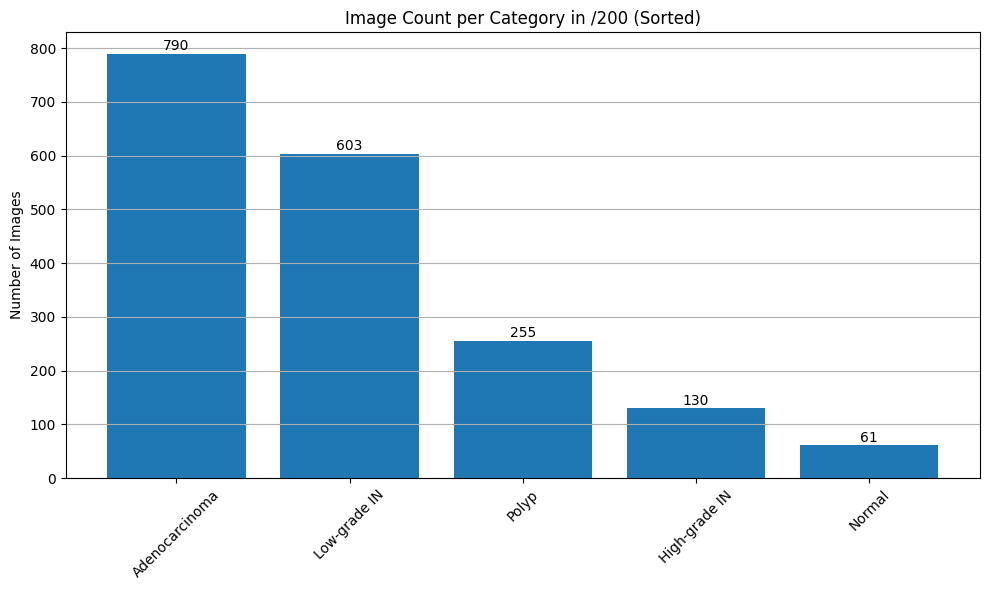

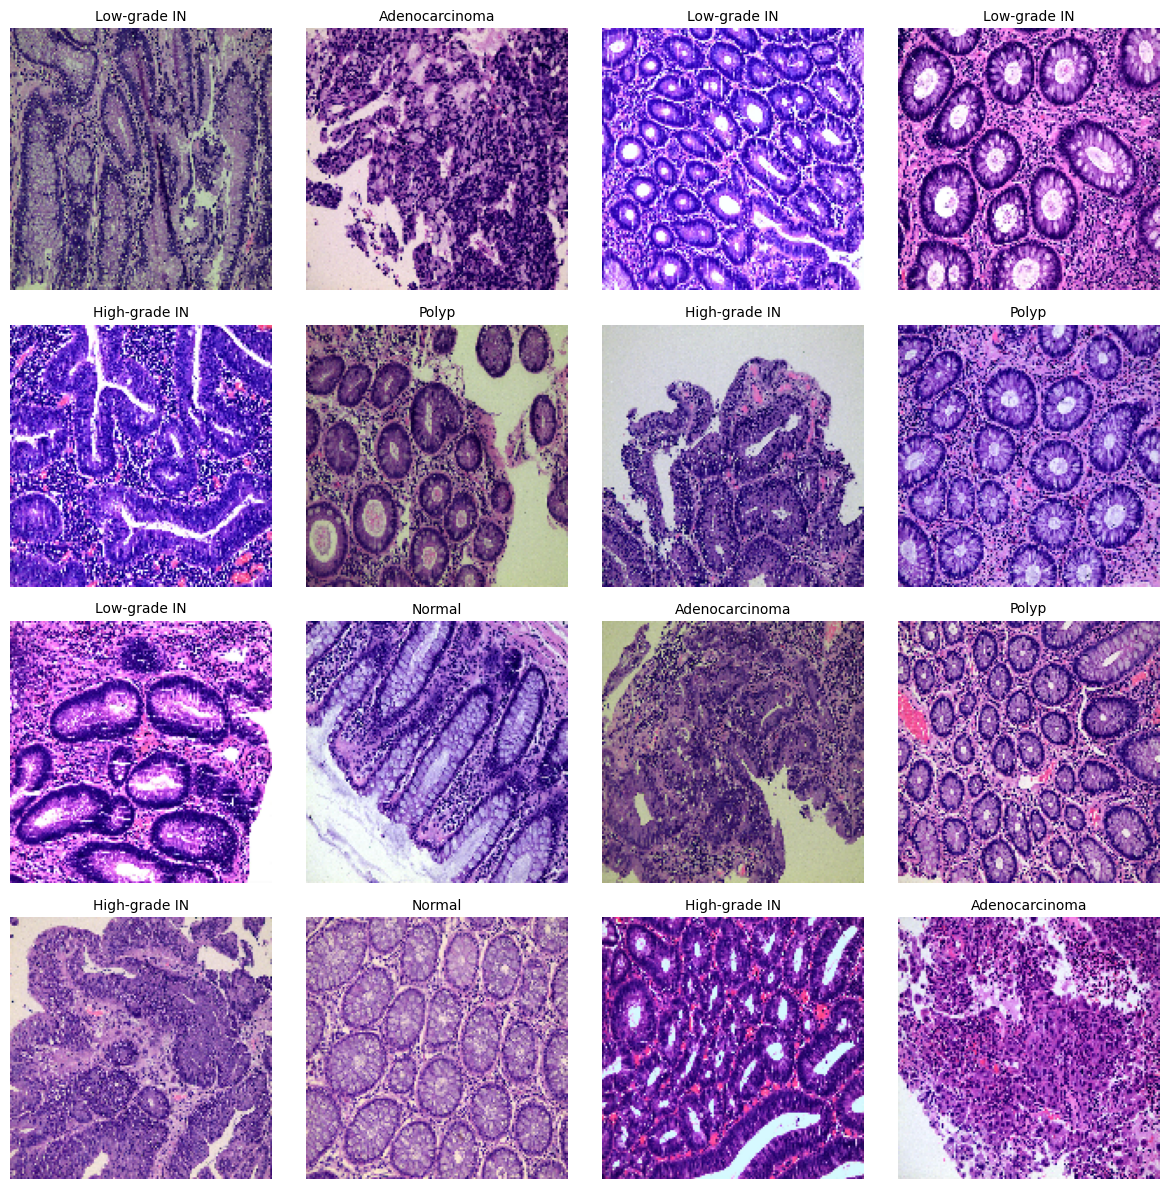

In [2]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from google.colab import drive

#  Mount Google Drive
drive.mount('/content/drive')

#  Set your dataset path
data_dir = '/content/drive/MyDrive/project/200'  # Replace with your own directory
img_size = (150, 150)  # Target size for displaying images
num_images = 16  # Number of sample images to show
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

#  Count number of images per category
categories = []
image_counts = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        count = 0
        for root, _, files in os.walk(folder_path):
            for file in files:
                if file.lower().endswith(image_extensions):
                    count += 1
        categories.append(folder)
        image_counts.append(count)

#  Sort by image count (descending order)
sorted_data = sorted(zip(categories, image_counts), key=lambda x: x[1], reverse=True)
categories, image_counts = zip(*sorted_data)

#  Plot image count per category (bar chart)
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, image_counts)
plt.ylabel('Number of Images')
plt.title('Image Count per Category in /200 (Sorted)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Collect image paths for preview (up to 5 per class)
image_paths = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = []
    for root, _, files in os.walk(category_path):
        for f in files:
            if f.lower().endswith(image_extensions):
                images.append(os.path.join(root, f))
    random.shuffle(images)
    for img_path in images[:5]:
        image_paths.append((img_path, category))

# Shuffle and pick the first 16 images
random.shuffle(image_paths)
image_paths = image_paths[:num_images]

#  Display sample images
plt.figure(figsize=(12, 12))
for i, (img_path, label) in enumerate(image_paths):
    img = load_img(img_path, target_size=img_size)
    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
